In [ ]:
pip install fuzzywuzzy

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, RFECV, VarianceThreshold
from fuzzywuzzy import fuzz,process

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Reading CSV file and storing in dataframe

In [ ]:
Wish = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
Wish.head(10)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,...,10194,4.076516,5652f4053a698c76dc9a3f37,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08
7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,EUR,1000,0,3.76,286,120.0,...,342,3.681287,5d45349676befe65691dcfbb,0,NaN,https://www.wish.com/c/5e0ae5ebc2efb76ccf0a3391,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391,summer,2020-08
8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,EUR,100,1,3.47,15,6.0,...,330,3.803030,5d42980e8388970d32294ddc,0,NaN,https://www.wish.com/c/5e6f1fb7fe4a5bb4b8bf36e5,https://contestimg.wish.com/api/webimage/5e6f1...,5e6f1fb7fe4a5bb4b8bf36e5,summer,2020-08
9,"Femmes d'été, plus la taille décontractée lâch...",Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,EUR,5000,0,3.60,687,287.0,...,5534,3.999819,5ba2251b4315d12ebce873fa,0,NaN,https://www.wish.com/c/5ccfaf238a8d535cec2dfb47,https://contestimg.wish.com/api/webimage/5ccfa...,5ccfaf238a8d535cec2dfb47,summer,2020-08


Dropping unwanted columns

In [ ]:
Wish=Wish.drop(['tags','currency_buyer','shipping_option_name','merchant_profile_picture','urgency_text','title','crawl_month','theme','product_url','product_picture','merchant_title','merchant_name','merchant_info_subtitle','merchant_id'],axis=1)

In [ ]:
Wish.shape

(1573, 29)

In [ ]:
Wish.isnull().any()

title_orig                      False
price                           False
retail_price                    False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count                True
rating_four_count                True
rating_three_count               True
rating_two_count                 True
rating_one_count                 True
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_total                 False
has_urgency_banner               True
origin_country                   True
merchant_rating_count           False
merchant_rat

In [ ]:
Wish.isnull().sum() #to show null values for each columns

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
origin_country                    17
merchant_rating_count              0
merchant_rating                    0
m

In [ ]:
Wish.isnull().sum().sum() 

1397

In [ ]:
Wish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [ ]:
Wish.head(10)

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,4,0,34,50,1.0,CN,568,4.128521,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,2,0,41,50,1.0,CN,17752,3.899673,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,3,0,36,50,1.0,CN,295,3.989831,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,2,0,41,50,NaN,CN,23832,4.020435,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,1,0,35,50,1.0,CN,14482,4.001588,0,5ebf5819ebac372b070b0e70
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,0.0,0.0,...,1,0,40,50,NaN,CN,65,3.507692,0,5ec645bafd107a02279c8c54
6,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.0,1352.0,971.0,...,2,0,31,50,NaN,CN,10194,4.076516,1,5c63a337d5e2ce4bbb3152cf
7,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,1000,0,3.76,286,120.0,56.0,61.0,...,3,0,139,50,NaN,CN,342,3.681287,0,5e0ae5ebc2efb76ccf0a3391
8,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,100,1,3.47,15,6.0,2.0,3.0,...,2,0,36,50,1.0,CN,330,3.803030,0,5e6f1fb7fe4a5bb4b8bf36e5
9,Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,5000,0,3.60,687,287.0,128.0,92.0,...,2,0,33,50,NaN,CN,5534,3.999819,0,5ccfaf238a8d535cec2dfb47


In [ ]:
Wish.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture', 'product_id'],
      dtype='object')

In [ ]:
Wish['uses_ad_boosts'].unique()

array([0, 1])

In [ ]:
Wish['badges_count'].unique()

array([0, 1, 2, 3])

In [ ]:
Wish['badge_local_product'].unique()

array([0, 1])

In [ ]:
Wish['badge_product_quality'].unique()

array([0, 1])

In [ ]:
Wish['origin_country'].unique()

array(['CN', 'US', nan, 'VE', 'AT', 'SG', 'GB'], dtype=object)

Data cleaning

In [ ]:
Wish['rating_five_count'] = Wish['rating_five_count'].fillna(0)
Wish['rating_four_count'] = Wish['rating_four_count'].fillna(0)
Wish['rating_three_count'] = Wish['rating_three_count'].fillna(0)
Wish['rating_two_count'] = Wish['rating_two_count'].fillna(0)
Wish['rating_one_count'] = Wish['rating_one_count'].fillna(0)

In [ ]:
Wish['has_urgency_banner'] = Wish['has_urgency_banner'].fillna(0)

In [ ]:
Wish['diff_price'] =Wish['retail_price'] - Wish['price']
Wish['discount_flag'] = np.where(Wish['diff_price'] > 1,1,0)
Wish['pct_discount_off'] = (Wish['retail_price'] - Wish['price'])/Wish['retail_price']
Wish['pct_discount_off'] = np.round(np.where(Wish['pct_discount_off']>0,Wish['pct_discount_off'],0),2)

Wish['pct_rating_one']=Wish['rating_one_count']/Wish['rating_count']
Wish['pct_rating_two']=Wish['rating_two_count']/Wish['rating_count']
Wish['pct_rating_three']=Wish['rating_three_count']/Wish['rating_count']
Wish['pct_rating_four']=Wish['rating_four_count']/Wish['rating_count']
Wish['pct_rating_five']=Wish['rating_five_count']/Wish['rating_count']


Wish['pct_badge_local_product'] = np.round(np.where(Wish['badges_count'] > 0, Wish['badge_local_product']/Wish['badges_count'], 0), 2)
Wish['pct_badge_product_quality'] = np.round(np.where(Wish['badges_count'] > 0, Wish['badge_product_quality']/Wish['badges_count'], 0), 2)
Wish['pct_badge_fast_shipping'] = np.round(np.where(Wish['badges_count'] > 0, Wish['badge_fast_shipping']/Wish['badges_count'], 0), 2)

Wish.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,discount_flag,pct_discount_off,pct_rating_one,pct_rating_two,pct_rating_three,pct_rating_four,pct_rating_five,pct_badge_local_product,pct_badge_product_quality,pct_badge_fast_shipping
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,0,0.00,0.166667,0.018519,0.185185,0.148148,0.481481,0.0,0.0,0.0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,1,0.64,0.175550,0.104971,0.182233,0.167400,0.369845,0.0,0.0,0.0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,1,0.81,0.214286,0.000000,0.142857,0.285714,0.357143,0.0,0.0,0.0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,0,0.00,0.062176,0.072539,0.150259,0.205527,0.509499,0.0,0.0,0.0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,0,0.09,0.300000,0.100000,0.100000,0.200000,0.300000,0.0,0.0,0.0


In [ ]:
Wish['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [ ]:
Wish['product_color'] = Wish['product_color'].astype('str')
def color(col):
  if '&' in col:
    return 'dual'
  else:
    return col
  return col

Wish['product_color'] = Wish['product_color'].apply(color)

Wish['product_color'].value_counts()

black          302
white          254
yellow         105
blue            99
pink            99
              ... 
nude             1
light green      1
star             1
wine red         1
gold             1
Name: product_color, Length: 84, dtype: int64

In [ ]:
Wish['id'] = Wish.index + 1
ref_list = ['black', 'brown', 'green','white','orange','brown','beige','grey','blue','yellow','red','dual','pink','purple','other']

inp_list = Wish['product_color'].unique().tolist()


score_sort = [(x,) + i
             for x in inp_list 
             for i in process.extract(x, ref_list,scorer=fuzz.partial_ratio)]
#Create a dataframe from the tuples
similarity_sort = pd.DataFrame(score_sort, columns=['product_color','new_color','score_sort'])
similarity_sort=similarity_sort[similarity_sort['score_sort']>90]


Wish1=pd.merge(Wish,similarity_sort,on='product_color', how='left')

Wish1=Wish1.drop_duplicates('id')

Wish1.shape

(1573, 43)

In [ ]:
Wish2=Wish1[Wish1['new_color'].isnull()]
Wish2['product_color'].value_counts()

nan             41
multicolor      20
khaki           12
gray            11
coffee           7
floral           5
rose             5
leopard          4
navy             4
camouflage       3
silver           2
wine             2
apricot          2
burgundy         2
camel            2
rosegold         1
violet           1
lightkhaki       1
jasper           1
ivory            1
leopardprint     1
claret           1
rainbow          1
lightgray        1
army             1
nude             1
tan              1
star             1
gold             1
Name: product_color, dtype: int64

In [ ]:
Wish1['new_color'].replace(np.nan, 'other', inplace=True)
Wish2=Wish1[Wish1['new_color'].isnull()]
Wish2['product_color'].value_counts()

Series([], Name: product_color, dtype: int64)

In [ ]:
# To check most sold item
Wish.sort_values(by='units_sold',ascending=False).head(1)


,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,pct_discount_off,pct_rating_one,pct_rating_two,pct_rating_three,pct_rating_four,pct_rating_five,pct_badge_local_product,pct_badge_product_quality,pct_badge_fast_shipping,id
214,New Aeeival Women Clothing Long Sleeve Autumn ...,8.0,7,100000,1,3.76,11062,4663.0,2418.0,1868.0,...,0.0,0.114898,0.076116,0.168866,0.218586,0.421533,0.0,0.0,0.0,215


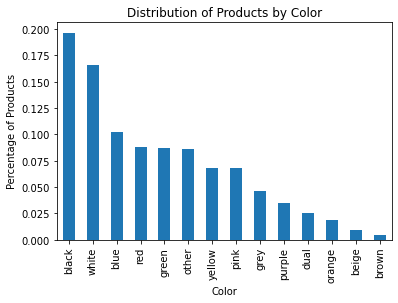

In [ ]:
plt.title('Distribution of Products by Color')
plt.ylabel('Percentage of Products')
plt.xlabel('Color')
Wish1['new_color'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
ref_list = ['Pants', 'Shorts', 'Shirt','TShirt','Top','Sleepwear','Dress','Beach','Bath','Fitness','Swim','Bikini','Jumpsuit','Yoga','Fitness','Jogging']

inp_list = Wish1['title_orig'].unique().tolist()


score_sort = [(x,) + i
             for x in inp_list 
             for i in process.extract(x, ref_list,scorer=fuzz.partial_ratio)]
#Create a dataframe from the tuples
similarity_sort = pd.DataFrame(score_sort, columns=['title_orig','prod_cat','score_sort'])


similarity_sort=similarity_sort[similarity_sort['score_sort']>=90]


Wish2=pd.merge(Wish1,similarity_sort,on='title_orig', how='left')

Wish2=Wish2.drop_duplicates('id')
print(Wish2.shape)

(1573, 45)


In [ ]:
Wish2['prod_cat'].value_counts(normalize=True)

Dress        0.318704
Shirt        0.233626
Top          0.140446
Pants        0.121540
Shorts       0.074274
Beach        0.048616
Jumpsuit     0.024983
Swim         0.010804
Bath         0.009453
Jogging      0.006077
Sleepwear    0.004727
Yoga         0.003376
Bikini       0.002701
Fitness      0.000675
Name: prod_cat, dtype: float64

In [ ]:
def f(Wish):
    if Wish['prod_cat'] in(['Swim','Bikini','Beach']) :
        val = 'Beach'
    elif Wish['prod_cat'] in(['Fitness','Jogging','Yoga']):
        val = 'Fitness'
    elif Wish['prod_cat'] in(['Pants']):
        val = 'Pants'
    elif Wish['prod_cat'] in(['Shorts']):
        val= 'Shorts'
    elif Wish['prod_cat'] in(['Shirt']):
        val= 'Shirt'
    elif Wish['prod_cat'] in(['TShirt']):
        val= 'TShirt'
    elif Wish['prod_cat'] in(['Top']):
        val= 'Top'
    elif Wish['prod_cat'] in(['Dress']):
        val= 'Dress'
    elif Wish['prod_cat'] in(['Bath']):
        val= 'Bath'
    elif Wish['prod_cat'] in(['Sleepwear']):
        val= 'Sleepwear'
    elif Wish['prod_cat'] in(['Jumpsuit']):
        val= 'Jumpsuit'
    else:
        val = 'Other'
    return val

Wish2['prod_cat'] = Wish2.apply(f, axis=1)

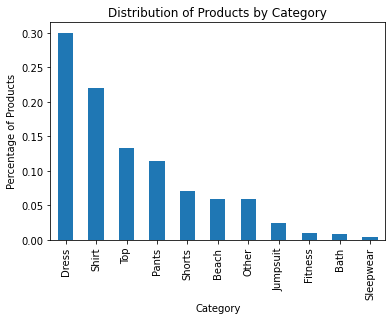

In [ ]:
plt.title('Distribution of Products by Category')
plt.ylabel('Percentage of Products')
plt.xlabel('Category')
Wish2['prod_cat'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
Wish2['product_variation_size_id'].value_counts()

S                      641
XS                     356
M                      200
XXS                    100
L                       49
                      ... 
6XL                      1
AU plug Low quality      1
XXXL                     1
25-S                     1
SIZE S                   1
Name: product_variation_size_id, Length: 106, dtype: int64

In [ ]:
def get_origin_country(Wish):
    if Wish['origin_country']=='US':
        val='US'
    elif Wish['origin_country']=='CN':
        val='CN'
    else:
        val='Others'
    return val
Wish2['origin_country']=Wish2.apply(get_origin_country,axis=1)
Wish2=Wish2.drop(['merchant_rating_count','rating_count','score_sort_x','title_orig','id','product_variation_size_id','score_sort_y','product_color','product_id','inventory_total','product_variation_inventory'],axis=1)


In [ ]:
Wish2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 2760
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_five_count             1573 non-null   float64
 6   rating_four_count             1573 non-null   float64
 7   rating_three_count            1573 non-null   float64
 8   rating_two_count              1573 non-null   float64
 9   rating_one_count              1573 non-null   float64
 10  badges_count                  1573 non-null   int64  
 11  badge_local_product           1573 non-null   int64  
 12  badge_product_quality         1573 non-null   int64  
 13  bad

In [ ]:
cat_df=Wish2.select_dtypes('object').columns

for col in cat_df:
    Wish2=pd.concat([Wish2.drop(col,axis=1),pd.get_dummies(Wish2[col],prefix=col, prefix_sep='_',dummy_na=False,drop_first=True)],axis=1)

Wish2.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,prod_cat_Beach,prod_cat_Dress,prod_cat_Fitness,prod_cat_Jumpsuit,prod_cat_Other,prod_cat_Pants,prod_cat_Shirt,prod_cat_Shorts,prod_cat_Sleepwear,prod_cat_Top
0,16.00,14,100,0,3.76,26.0,8.0,10.0,1.0,9.0,...,0,0,0,0,0,0,0,1,0,0
4,8.00,22,20000,1,3.45,2269.0,1027.0,1118.0,644.0,1077.0,...,0,1,0,0,0,0,0,0,0,0
5,8.00,43,100,0,3.57,5.0,4.0,2.0,0.0,3.0,...,1,0,0,0,0,0,0,0,0,0
6,8.00,8,5000,1,4.03,295.0,119.0,87.0,42.0,36.0,...,0,0,0,0,0,0,1,0,0,0
8,2.72,3,100,1,3.10,6.0,4.0,2.0,2.0,6.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# split the data randomly into training and validation datasets
X = Wish2.drop('units_sold',axis=1)
y = Wish2['units_sold']
    
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=42)

# standardize the data
stdsc = StandardScaler()
X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
X_train_std.columns = X_train.columns

X_valid_std = pd.DataFrame(stdsc.transform(X_valid))
X_valid_std.columns = X_valid.columns

X_train_std.head()

,price,retail_price,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,prod_cat_Beach,prod_cat_Dress,prod_cat_Fitness,prod_cat_Jumpsuit,prod_cat_Other,prod_cat_Pants,prod_cat_Shirt,prod_cat_Shorts,prod_cat_Sleepwear,prod_cat_Top
0,-0.653976,-0.535314,-0.867862,0.791692,-0.272584,-0.285729,-0.327263,-0.309837,-0.407802,-0.31268,...,-0.240077,-0.640102,-0.095739,-0.16154,-0.252523,-0.367494,1.840232,-0.26843,-0.067543,-0.387905
1,1.190196,0.209876,-0.867862,-1.699559,0.396413,0.697665,1.590694,3.083295,4.160780,-0.31268,...,-0.240077,1.562250,-0.095739,-0.16154,-0.252523,-0.367494,-0.543410,-0.26843,-0.067543,-0.387905
2,-0.064343,-0.340917,-0.867862,0.316262,0.952270,0.827965,0.815629,0.740583,0.730726,-0.31268,...,-0.240077,1.562250,-0.095739,-0.16154,-0.252523,-0.367494,-0.543410,-0.26843,-0.067543,-0.387905
3,-0.899866,-0.632513,1.152257,-1.794645,-0.434914,-0.428322,-0.379810,-0.392765,-0.340262,-0.31268,...,-0.240077,-0.640102,-0.095739,-0.16154,-0.252523,2.721136,-0.543410,-0.26843,-0.067543,-0.387905
4,-0.064343,-0.535314,1.152257,-0.938872,-0.451639,-0.452906,-0.448777,-0.441140,-0.456045,-0.31268,...,-0.240077,-0.640102,-0.095739,-0.16154,-0.252523,2.721136,-0.543410,-0.26843,-0.067543,-0.387905


In [65]:
### Feature importance with Random Forest ###

feat_labels = pd.DataFrame(X_train_std.columns[1:])
forest = RandomForestRegressor(n_estimators = 500,
                               random_state = 0,
                               n_jobs = -1)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
forest.fit(X_train, y_train)
importances = pd.DataFrame(forest.feature_importances_)

rf_importances = feat_labels.merge(importances,left_index = True, right_index = True)
rf_importances.columns = ['features','rf_importance']
rf_importances.sort_values('rf_importance', ascending = False, inplace = True) 
rf_importances['rf_rank'] = range(1, len(rf_importances) + 1)

top_vars = rf_importances.iloc[:15,0].tolist()
X_train_top = X_train_std[top_vars]
X_valid_top = X_valid_std[top_vars]

rf_importances=rf_importances[rf_importances['rf_rank'] <=15]
rf_importances
X_train_top = X_train_top.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_valid_top = X_valid_top.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    
accuracy = cross_val_score(estimator = regressor, X = X_train_top, y = y_train, cv=10)
cv = accuracy.mean()*100

# print(cv)


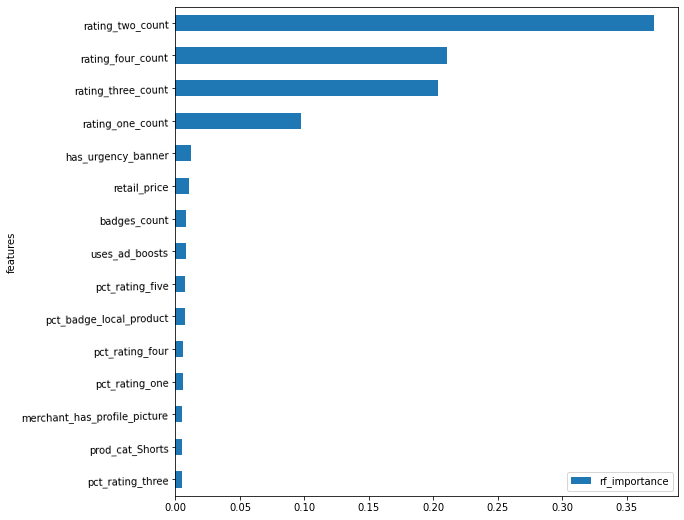

In [ ]:
plt.rcParams["figure.figsize"] = (9,9)
rf_importances.sort_values('rf_importance',inplace=True)
ax = rf_importances.plot.barh(x='features', y='rf_importance', rot=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross validation
from sklearn.model_selection import cross_val_score


regressors = [LinearRegression(),
             DecisionTreeRegressor(random_state=1),
             RandomForestRegressor(n_estimators = 10, random_state=1),
             GradientBoostingRegressor(random_state = 0),
             linear_model.Lasso(alpha=10)]

df = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 
                             'Cross Validation Score (Mean Accuracy)', 'R2 Score'])

for regressor in regressors:
    X_train_top = X_train_top.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

    regressor.fit(X_train_top, y_train)
    
    y_pred = regressor.predict(X_valid_top)
    X_valid_top = X_valid_top.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    # print classifier name
    s = str(type(regressor)).split('.')[-1][:-2]
    
    # Train Score
    train = regressor.score(X_train_top, y_train)
    
    # Test Score
    test = regressor.score(X_valid_top, y_valid)
    
    # MAE score
    mae = mean_absolute_error(y_valid, y_pred)
    
    # MSE Score
    mse = mean_squared_error(y_valid, y_pred)
    
    accuracy = cross_val_score(estimator = regressor, X = X_train_top, y = y_train, cv=10)
    cv = accuracy.mean()*100
    
    r2 = r2_score(y_valid, y_pred)
    
    df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae, 
                    'Mean Squared Error': mse, 'Cross Validation Score (Mean Accuracy)': cv,
                   'R2 Score': r2},
                  ignore_index=True)
df.head()

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.811505,0.802636,2025.221766,2.027276e+07,78.301579,0.802636
1,DecisionTreeRegressor,1.000000,0.746936,1385.578743,2.599419e+07,57.181428,0.746936
2,RandomForestRegressor,0.955710,0.823266,1444.088136,1.815375e+07,78.604001,0.823266
3,GradientBoostingRegressor,0.969974,0.806062,1567.931433,1.992087e+07,75.670122,0.806062
4,Lasso,0.811412,0.802693,2012.148904,2.026688e+07,78.631712,0.802693
